# Sawtooth Wave Generator

A *sawtooth wave* is a periodic function that starts at an initial value, ramps up at a fixed rate until reaching an end value, and then drops to the starting value and repeats.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def saw(x):
    return x % 50

x = np.arange(0, 200)

plt.plot(x, saw(x))

In [ ]:
import magma as m
m.set_mantle_target("ice40")
from loam.boards.icestick import IceStick

N = 8

icestick = IceStick()
icestick.Clock.on()
for i in range(N):
    icestick.J3[i].output().on()

In [ ]:
import mantle

main = icestick.main()
# TODO: Define main

m.EndDefine()

In [ ]:
m.compile('build/sawtooth', main, vendor="lattice")

In [ ]:
%%bash
cd build
cat sawtooth.pcf
yosys -q -p 'synth_ice40 -top main -blif sawtooth.blif' sawtooth.v
arachne-pnr -q -d 1k -o sawtooth.txt -p sawtooth.pcf sawtooth.blif 
icepack sawtooth.txt sawtooth.bin
iceprog sawtooth.bin

Wire up the GPIO pins to a logic analyzer to verify that the circuit produces the correct sawtooth waveform.

![](images/sawtooth.png)

You can also use Saleae's [export data](https://support.saleae.com/hc/en-us/articles/115005986806-Saving-Loading-and-Exporting-Data) feature to output a [csv file](data/saw-capture.csv). Replace our sample data with yours to check your results using matplotlib.

In [1]:
import csv
import magma as m
with open("data/saw-capture.csv") as saw_capture_csv:
    csv_reader = csv.reader(saw_capture_csv)
    next(csv_reader, None)  # skip the headers
    rows = [row for row in csv_reader]
timestamps = [float(row[0]) for row in rows]
values = [m.bitutils.seq2int(tuple(int(x) for x in row[1:])) for row in rows]

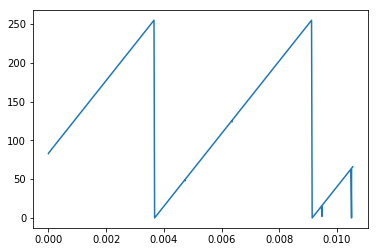

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(timestamps[:500], values[:500], "-")